[0.49050000000000005, 0.9810000000000001, 1.4715, 1.9620000000000002, 2.4525, 2.943, 3.4335, 3.9240000000000004]
[1.3000000000000034, 2.800000000000007, 4.200000000000004, 5.600000000000009, 7.000000000000006, 8.300000000000004, 9.700000000000003, 10.900000000000002]
[3.200000000000003, 4.200000000000004, 5.100000000000002, 6.000000000000001, 6.800000000000002, 7.800000000000007, 8.800000000000004, 9.700000000000003]
[1.3000000000000034, 2.4000000000000066, 3.500000000000001, 4.700000000000002, 6.000000000000001, 7.300000000000009, 8.5, 9.700000000000003]
---------------Geradenfit----------------
List Works
x_strich = 2.20725
y_strich = 6.225000000000005
x2_strich =6.135051375
xy_strich = 17.27786250000001
----------------------------------------------------------------------------
Steigung: m = 2.8008349109266533
y-Achsenabschnitt: b = 0.042857142857150754
Sigma y: sigmay = 2.0200000000000005
Fehler Steigung: dm = 0.44710757495925285
Fehler y-Achsenabschnitt db = 1.1074423558039364
--

/tmp/ipykernel_85/68993928.py:21: RuntimeWarning: divide by zero encountered in scalar divide
  return n / (np.sum(1 / val ** 2))


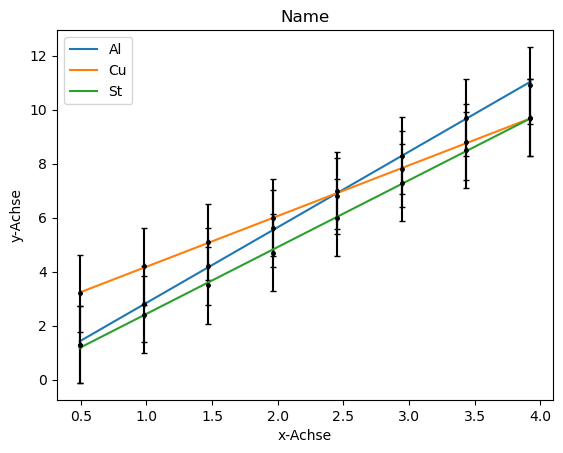

65913.27757668117
110054.19226152055
197002.8232033652


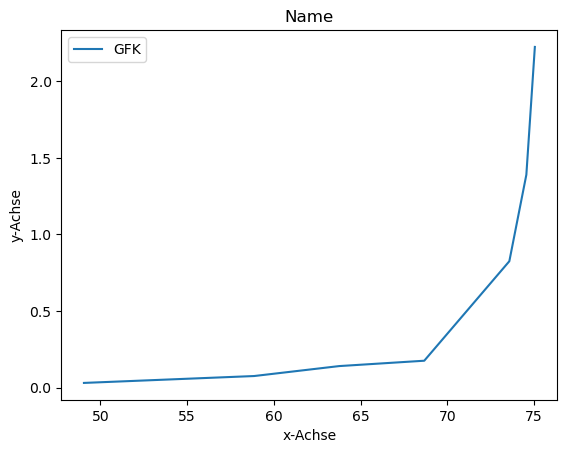

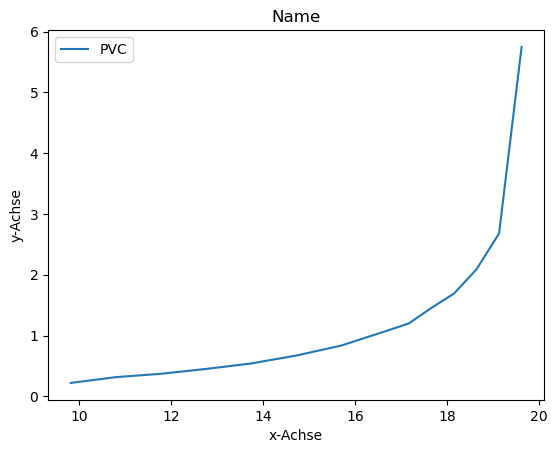

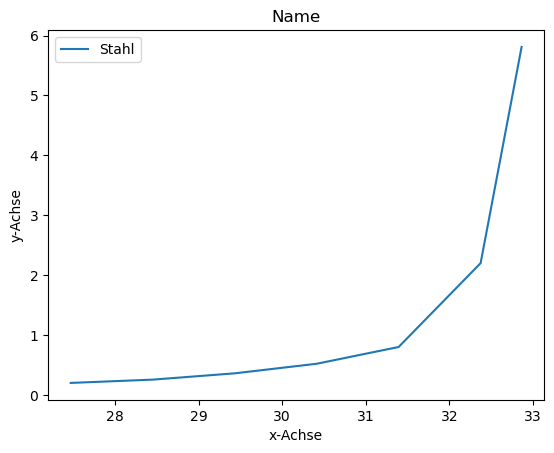

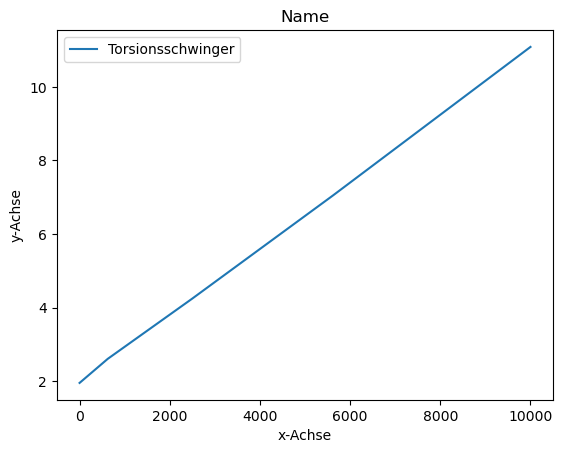

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt

def geradenfit(x, y, x_err, y_err, lab):
    x = np.asarray(x)
    y = np.asarray(y)
    x_err = np.asarray(x_err)
    y_err = np.asarray(y_err)
    print('---------------Geradenfit----------------')
    # Mittelwert
    def mittel(x, n):
        return (1 / n) * np.sum(x)

    # varianzgewichteter Mittelwert
    def mittel_var(val, z):
        return np.sum(z / (val ** 2)) / np.sum(1 / (val ** 2))

    # varianzgemittelte Standardabweichung
    def sigma(val, n):
        return n / (np.sum(1 / val ** 2))

    # gerade
    def polynom(m, b, x):
        return m * x + b

    if len(x)==len(y):
        n = len(x)
        print('List Works')
    else:
        print('x and y are not the same length')

    x_strich = mittel_var(y_err, x)
    x2_strich = mittel_var(y_err,x ** 2)
    y_strich = mittel_var(y_err,y)
    xy_strich = mittel_var(y_err,x * y)
    print(f'{x_strich = }')
    print(f'{y_strich = }')
    print(f'{x2_strich =}')
    print(f'{xy_strich = }')
    print('----------------------------------------------------------------------------')
    m = (xy_strich - (x_strich * y_strich)) / (x2_strich - x_strich ** 2)
    b = (x2_strich * y_strich - x_strich * xy_strich) / (x2_strich - x_strich ** 2)
    print(f'Steigung: {m = }')
    print(f'y-Achsenabschnitt: {b = }')

    sigmax = sigma(x_err, n)
    sigmay = sigma(y_err, n)

    dm = np.sqrt(sigmay / (n * (x2_strich - x_strich ** 2)))
    db = np.sqrt(sigmay * x2_strich / (n * (x2_strich - (x_strich ** 2))))
    print(f'Sigma y: {sigmay = }')
    print(f'Fehler Steigung: {dm = }')
    print(f'Fehler y-Achsenabschnitt {db = }')
    print('----------------------------------------------------------------------------')
    # create dictionary for further calculations
    res = {
        'm':m,
        'b':b,
        'dm':dm,
        'db':db,
    }
    
    # plot
    print('----------------------------------------------------------------------------')
    #fig, ax = plt.subplots()
    plt.title('Name')
    plt.ylabel(r'y-Achse')
    plt.xlabel(r'x-Achse')
    plt.errorbar(x, y, xerr=x_err, yerr=y_err, capsize=2, fmt='.', markersize=5, color='black')
    #plt.plot(x, polynom(m,b,x), label =lab)
    plt.plot(x, m * x + b, label=lab)#f'$y = ({m:0.3e})x+({b:+0.3e})$')
    plt.legend()
    
    return res


def plot(x, y, x_er, y_er, lab):
    x = np.asarray(x)
    y = np.asarray(y)
    x_err = np.asarray(x_er)
    y_err = np.asarray(y_er)

    #fig, ax = plt.subplots()
    plt.title('Name')
    plt.ylabel(r'y-Achse')
    plt.xlabel(r'x-Achse')
    if x_er != 0 and y_er != 0:
        plt.errorbar(x, y, xerr=x_err, yerr=y_err, capsize=2, fmt='.',label=lab, markersize=5, color=col)
    else:
        plt.plot(x, y, label=lab)
    #plt.plot(x, polynom(m,b,x), label =lab)
    #plt.plot(x, m * x + b, label=lab)#f'$y = ({m:0.3e})x+({b:+0.3e})$')
    plt.legend()
    
#############################################################################################################

m = [50,100,150,200,250,300,350,400]
F = lambda m : m/1000* 9.81
d = 4.9
dh = 0.1
g = 15.3
h1 = 3.65

al = [26.5,25,23.6,22.2,20.8,19.5,18.1,16.9]
cu = [24.6,23.6,22.7,21.8,21,20,19,18.1]
st = [26.5,25.4,24.3,23.1,21.8,20.5,19.3,18.1]

c = lambda p :  (d - 1/10 * (p-g) - h1) * 10
dc = lambda p : math.sqrt((dh)**2 + (-1/10 * dh)**2 + (1/10 *dh)**2 + (dh)**2) * 10
print([F(i) for i in m])
print([c(i) for i in al])
print([c(i) for i in cu])
print([c(i) for i in st])
res_al =geradenfit([F(i) for i in m], [c(i) for i in al], 0, [dc(i) for i in al], "Al")
res_cu =geradenfit([F(i) for i in m], [c(i) for i in cu], 0, [dc(i) for i in cu], "Cu")
res_st =geradenfit([F(i) for i in m], [c(i) for i in st], 0, [dc(i) for i in st], "St")
plt.show()
E= lambda m,b,h : (400**3)/(4*m*b*(h)**3)

print(E(res_al['m'],10.06, 2.05))
print(E(res_cu['m'],9.97, 1.98))
print(E(res_st['m'],10.12,1.48))

#############################################################################################################

w0 = 102.14
m1 = [5000,6000,6500,7000,7500,7600,7650]
w1 = [102.17,102.215,102.28,102.315,102.965,103.53,104.365]

w01 = 102.25
m2 = [1000,1100,1200,1300,1400,1500,1600,1700,1750,1800,1850,1900,1950,2000]
w2 = [102.47,102.565,102.62,102.7,102.79,102.92,103.085,103.325,103.45,103.705,103.94,104.34,104.93,108]

w02 = 102.19
m3 = [2800,2900,3000,3100,3200,3300,3350]
w3 = [102.39,102.445,102.55,102.71,102.99,104.39,108]

plot([F(i) for i in m1], [i - w0 for i in w1], 0, 0, "GFK")
plt.show()
plot([F(i) for i in m2], [i - w01 for i in w2], 0, 0, "PVC")
plt.show()
plot([F(i) for i in m3], [i - w02 for i in w3], 0, 0, "Stahl")
plt.show()
#############################################################################################################

m =200
r = 15
d = 16

T0 = [14,14.05,13.94,13.92,14.04]
T2 = [16.26,16.08,16.11,16.24,16.11]
T5 = [10.25,10.34,10.32,10.34,10.28]
T7 = [13.22,13.25,13.23,13.32,13.38]
T10 = [9.91,10,10.05,9.93,10.05]

t = [np.mean(T0)/10,np.mean(T2)/10,np.mean(T5)/5,np.mean(T7)/5,np.mean(T10)/3]
a = [0,25,50,75,100]

plot([i*i for i in a], [i*i for i in t],0,0,"Torsionsschwinger")